In [1]:
from pymongo import MongoClient, errors
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [2]:
import pandas as pd

In [95]:
ls data/

ban_df.csv  df_watchexchange.csv  legacy.csv


In [3]:
banned = pd.read_csv('data/ban_df.csv', converters={'comments': eval})
subs = pd.read_csv('data/df_watchexchange.csv', converters={'comments': eval})

In [4]:
banned['is_scammer'] = True
subs['is_scammer'] = False

In [5]:
df = pd.concat([banned,subs])

In [6]:
df.is_scammer.value_counts()

False    1115
True      429
Name: is_scammer, dtype: int64

In [7]:
df['comments_new'] = df['comments'].map(lambda x: " ".join(x))

In [8]:
df

,users,link_karma,comment_karma,verified,mod,gold,days_old,comments,total_comments,positive,neutral,negative,len_cs,mean_comment_length,mode_comment_length,median_comment_length,duplicate_comments,is_scammer,comments_new
0,Pellijak,1,-7,False,False,False,2991,"[Hello Guys,\nMy friend made a paste with trus...",20,0.750000,0.150000,0.100000,"[224, 224, 224, 224, 224, 224, 10, 52, 28, 15,...",145.200000,224,224.0,10,True,"Hello Guys,\nMy friend made a paste with trust..."
1,holaquetal12,1,19,True,False,False,810,"[Same here, Damn..., She sent me a text messag...",13,0.692308,0.230769,0.076923,"[9, 7, 117, 16, 57, 75, 86, 70, 41, 46, 110, 1...",56.769231,9,57.0,0,True,Same here Damn... She sent me a text message t...
2,CalmingTingles,10,42,True,False,False,1294,"[My thoughts exactly , This guy is so toxic, h...",30,0.233333,0.233333,0.533333,"[20, 148, 32, 93, 64, 316, 216, 16, 192, 601, ...",259.800000,753,204.5,1,True,"My thoughts exactly This guy is so toxic, how..."
3,VeronicaClark,1,1,False,False,False,1481,[i gave you photo proof so i am not a scammer ...,2,0.500000,0.500000,0.000000,"[60, 41]",50.500000,60,50.5,0,True,i gave you photo proof so i am not a scammer e...
4,nsfwthrwawayy,4870,46,False,False,False,1091,"[#FuckZaza, I have IW if you're interested sti...",4,0.500000,0.500000,0.000000,"[9, 36, 23, 39]",26.750000,9,29.5,0,True,#FuckZaza I have IW if you're interested still...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,WDCee,12,84,True,False,False,1999,"[PM'd, interested in multiple watches., It doe...",87,0.471264,0.367816,0.160920,"[37, 424, 182, 195, 50, 245, 7, 64, 110, 91, 7...",95.103448,8,71.0,1,False,"PM'd, interested in multiple watches. It does ..."
1111,love_marmite,5542,176,False,False,False,1868,[With having this Speedmaster on the bracelet ...,86,0.546512,0.220930,0.232558,"[525, 89, 525, 36, 30, 278, 511, 964, 77, 885,...",135.162791,36,77.0,0,False,With having this Speedmaster on the bracelet f...
1112,prince_oysterdate,418,1157,True,False,False,1298,"[I before E, except after C. Or when sounded a...",520,0.636538,0.232692,0.130769,"[77, 272, 36, 621, 10, 1943, 48, 714, 97, 163,...",192.534615,10,85.5,14,False,"I before E, except after C. Or when sounded as..."
1113,bikewobble,1187,844,True,True,True,2630,"[well if you got 7 minutes, coincidentally she...",395,0.473418,0.278481,0.248101,"[153, 515, 137, 201, 164, 808, 566, 463, 613, ...",326.035443,61,170.0,2,False,"well if you got 7 minutes, coincidentally she ..."


In [15]:
# 1. Create a set of documents.

In [25]:
documents = []
for comment_list in df.comments:
    for comment in comment_list:
        documents.append("".join(comment.lower()))

In [37]:
len(documents)

820334

In [39]:
# 2. Create a set of tokenized documents.
docs = [word_tokenize(content) for content in documents]

In [416]:
#vectorizer changing parameters here

vec = TfidfVectorizer(
    stop_words='english',
    min_df=3,  # min count for relevant vocabulary
    max_features=5000,  # maximum number of features
    strip_accents='unicode',  # replace all accented unicode char 
    # by their corresponding  ASCII char
    analyzer='word',  # features made of words
    token_pattern=r'[a-zA-Z]{3,}',  # tokenize only words of 3+ chars
     ngram_range=(1, 1),  # features made of a single tokens
#     use_idf=True,  # enable inverse-document-frequency reweighting
    smooth_idf=True,  # prevents zero division for unseen words
    sublinear_tf=False)

In [ ]:
#tokenizers to use

def tokenize(doc):
    '''
    INPUT: string
    OUTPUT: list of strings

    Tokenize and stem/lemmatize the document.
    '''
    return [wordnet.lemmatize(word) for word in word_tokenize(doc.lower())]

import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [ ]:
#this one works well 

# import re, string
# re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
# def tokenize(s): return re_tok.sub(r' \1 ', s).split()

# vec = TfidfVectorizer(
#     min_df=3,  # min count for relevant vocabulary
#     max_features=5000,  # maximum number of features
#     strip_accents='unicode',  # replace all accented unicode char 
#     # by their corresponding  ASCII char
#     analyzer='word',  # features made of words
#     token_pattern=r'\w{1,}',  # tokenize only words of 4+ chars
# #     ngram_range=(1, 1),  # features made of a single tokens
# #     use_idf=True,  # enable inverse-document-frequency reweighting
#     smooth_idf=True,  # prevents zero division for unseen words
#     sublinear_tf=False)

In [417]:
vecced = vec.fit_transform(documents)

In [418]:
vec.get_feature_names()

['abilities',
 'ability',
 'able',
 'abs',
 'absolute',
 'absolutely',
 'absurd',
 'abuse',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'accepted',
 'accepting',
 'access',
 'accessories',
 'accident',
 'accidentally',
 'according',
 'account',
 'accounting',
 'accounts',
 'accuracy',
 'accurate',
 'accurately',
 'accusations',
 'achieve',
 'acid',
 'acquired',
 'acrylic',
 'act',
 'acting',
 'action',
 'actions',
 'active',
 'actively',
 'activities',
 'activity',
 'actor',
 'acts',
 'actual',
 'actually',
 'adapter',
 'add',
 'added',
 'addiction',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'adds',
 'adidas',
 'adjust',
 'adjustable',
 'adjusted',
 'adjustment',
 'administration',
 'admit',
 'ads',
 'adult',
 'adults',
 'advance',
 'advanced',
 'advantage',
 'adventure',
 'advertising',
 'advice',
 'aesthetic',
 'aesthetics',
 'afd',
 'affect',
 'affected',
 'afford',
 'affordable',
 'afraid',
 'aftermarket',
 'afternoon',
 'age',
 'aged',
 'agency',
 

In [388]:
df = df.reset_index(drop=True)

In [389]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
X = df['comments_new']
y = df['is_scammer']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [390]:
X_train

359     As someone who's been watching Doctor Who thei...
812     so much trash.... i was not patting myself on ...
1028    The watch is authentic.  There has never been ...
702     I volunteered last year. While they put on a g...
195     If you have another device, log in on there an...
                              ...                        
715     Let’s be honest. He’s obviously been very roug...
905     This. I agree. I'm all for racial equality and...
1096    Really?!?!? I'd happily lay down my life for m...
235     U were prob the shitty type of le. No way u sh...
1061    I doubt it. It wasn't announced for a reason. ...
Name: comments_new, Length: 1158, dtype: object

In [419]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(vec, MultinomialNB())
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=5000,
                                 min_df=3, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents='unicode',
                                 sublinear_tf=False,
                                 token_pattern='[a-zA-Z]{3,}', tokenizer=None,
                                 use_idf=True, vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [420]:
y_pred_prob = model.predict_proba(X_test)

In [430]:
threshold = .25
predicted = y_pred_prob[:, 1] >= threshold
accuracies = accuracy_score(y_test, predicted)
precisions = precision_score(y_test, predicted)
recalls = recall_score(y_test, predicted)

print("accuracy:", np.average(accuracies))
print("precision:", np.average(precisions))
print("recall:", np.average(recalls))

accuracy: 0.8886010362694301
precision: 0.7322834645669292
recall: 0.9117647058823529


In [446]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob[:,1])

0.9509458713062691

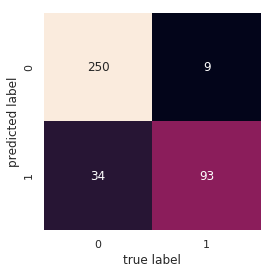

In [431]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


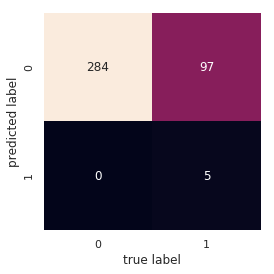

In [321]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


In [81]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
import numpy as np

In [392]:
threshold = .15
predicted = y_pred_prob[:, 1] >= threshold
accuracies = accuracy_score(y_test, predicted)
precisions = precision_score(y_test, predicted)
recalls = recall_score(y_test, predicted)

print("accuracy:", np.average(accuracies))
print("precision:", np.average(precisions))
print("recall:", np.average(recalls))

accuracy: 0.8756476683937824
precision: 0.6875
recall: 0.9705882352941176


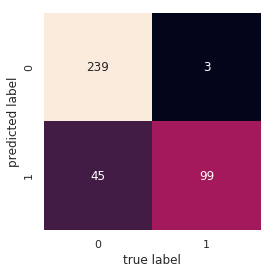

In [338]:
mat = confusion_matrix(y_test, predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [46]:
from wordcloud import WordCloud, STOPWORDS 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# not working

# comment_words = ' '
# stopwords = set(STOPWORDS) 
  
# # iterate through the csv file 
# for val in documents: 
#     tokens = val.split() 
#     for i in range(len(tokens)): 
#         tokens[i] = tokens[i].lower() 
          
#     for words in tokens: 
#         comment_words = comment_words + words + ' '
  
  
# wordcloud = WordCloud(width = 800, height = 800, 
#                 background_color ='white', 
#                 stopwords = stopwords, 
#                 min_font_size = 10).generate(comment_words) 
  
# # plot the WordCloud image                        
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
  
# plt.show() 

KeyboardInterrupt: 

In [404]:
for idx, row in enumerate(y_pred_prob):
    if row[1] >= .90:
        print(idx)

166
205
277
300
345
362


In [407]:
#300 is highest prob => #321 for X_test
highest = X_test[321]
X_test[321]

'I miss him Id protect it the lil jamal can grow up as a bull  its a shame he is hacking Close the door Since all posts got removed by mods on powertrip here discuss  Whatever that means,also im not a trump supporter and im banned from the donald go to /r/conspiracy you nuthead I miss my cat thx for making me cry i bet u kiss the girls u faggot Wow 30 bucks so rich,i could literally get tickets yesterday you inbelic this was a best of 5 he still lost Ok guys im memeing ram ssd amd cpu I\'d suck that dudes dick Then maybe just maaaaybe don\'t exploit him? They knew exactly what they were doing and what can happen and they still did it all tsm is blaming deathtimers now :^ ) I dont like being told to kill myself for supporting a communist (exact words) ty Check the last post in my history I might have skipped that part sorry kinda tired do u support islam? I fc\'d this map and got instantly restricted :( Texting is straight up annoying or ignored i was just memeing fam fuck riot cancer d

In [402]:
X_test[19]

'Lord.\n\n\nAs I\'ve stated on other posts, I\'ve done work for this gentleman before. \n\nAnd will do again if he needs me.\n\nI have been paid extremely promptly and the work is fast and easy as described. And yes, it\'s legal. \n\n;) That\'s because cheap food is unhealthy food. Stuff that\'s good for you costs a freakin\' fortune. Jesus H Christ on a kitten, THIS IS NOT A MOTHER EFFING EXPLOIT.\n\nThat dude who reported, I hope you whale and get MY relic luck for awhile for being so ridiculously dumb.\n\nHit & Run involves:\n\nEntering battle normally \n\nAttacking an enemy normally\n\nRunning away normally\n\nAnd repeating... again normally.\n\nThere is no exploit. There is no real "trick". It\'s incredibly boring to do, but it can result in charging SB gauges as long as you can stomach doing it.\n\n**tl;dr H&R isn\'t an exploit, anyone who thinks it is is a moron** Tell me how someone in this situation personally affects you?\n\n\nSeriously, it doesn\'t, so ignore it if it bother

In [372]:
why1 = X_test.reset_index().iloc[83]['comments_new'] #424

In [177]:
why2 = X_test.reset_index().iloc[97]['comments_new']

In [178]:
why3 = X_test.reset_index().iloc[173]['comments_new']

In [179]:
why4 = X_test.reset_index().iloc[215]['comments_new']

In [364]:
X_test.reset_index().iloc[287]['comments_new']

'how do i bump this post ? Add me in skype FaithFulGamer add me in skype faithFulGamer'

In [354]:
faithfulgamer = X_test.reset_index().iloc[287]['comments_new']

In [356]:
faithfulgamer = vec.transform([faithfulgamer])

In [357]:
print(faithfulgamer)

  (0, 4032)	0.93674691608202
  (0, 3288)	0.15212975172053547
  (0, 559)	0.3152169948658757


In [368]:
vocab2[559]

'bump'

In [166]:
vec.vocabulary_

{'as': 512,
 'someone': 4111,
 'who': 4866,
 's': 3805,
 'been': 641,
 'watching': 4808,
 'doctor': 1464,
 'their': 4435,
 'entire': 1634,
 'life': 2627,
 'even': 1663,
 'before': 645,
 'the': 4433,
 'i': 2287,
 'didn': 1411,
 't': 4358,
 'think': 4453,
 'it': 2430,
 'was': 4796,
 'great': 2061,
 'tone': 4517,
 'good': 2036,
 'impressive': 2327,
 'liked': 2637,
 'don': 1476,
 'like': 2636,
 'thought': 4462,
 'she': 3966,
 'boring': 742,
 'deliver': 1360,
 'a': 283,
 'lot': 2702,
 'of': 3082,
 'lines': 2647,
 'very': 4739,
 'well': 4843,
 'and': 428,
 'bring': 786,
 'anything': 453,
 'new': 3007,
 'to': 4509,
 'role': 3765,
 'just': 2490,
 'felt': 1804,
 'trying': 4598,
 'hard': 2133,
 'also': 404,
 'feel': 1796,
 'an': 425,
 'episode': 1640,
 'know': 2530,
 'show': 4001,
 'has': 2141,
 'change': 946,
 'but': 838,
 'changed': 947,
 'in': 2331,
 'past': 3218,
 'managed': 2752,
 'keep': 2497,
 'this': 4458,
 'did': 1410,
 'kind': 2517,
 'there': 4442,
 'no': 3025,
 'disappointed': 1438,
 

In [170]:
from collections import defaultdict
vocab = defaultdict(int)
for k,v in vec.vocabulary_.items():
    vocab[v] = k

In [365]:
from collections import defaultdict
vocab2 = defaultdict(int)
for k,v in vec.vocabulary_.items():
    vocab2[v] = k

In [174]:
# I thought it was going to be faithfulgamer, but skype was the highest weight
vocab[4058]

'skype'

In [175]:
vocab[825]

'bump'

In [373]:
why1 = vec.transform([why1])

In [374]:
print(why1)

  (0, 4948)	0.107815366010584
  (0, 4942)	0.0925328953685522
  (0, 4571)	0.26445341224047625
  (0, 4570)	0.3519829966461633
  (0, 4476)	0.08747305902641725
  (0, 4340)	0.10791575671793288
  (0, 4079)	0.10001035393790282
  (0, 4049)	0.1559730053164025
  (0, 4032)	0.28818527360345697
  (0, 4030)	0.25385210890705706
  (0, 3233)	0.12848139734843164
  (0, 2940)	0.12214586865398472
  (0, 2919)	0.09435434339314072
  (0, 2594)	0.12324739524312704
  (0, 2511)	0.10821773935134682
  (0, 2368)	0.1663310558115816
  (0, 2313)	0.1492226918481254
  (0, 1927)	0.08831873199156695
  (0, 1897)	0.16895202297099937
  (0, 1853)	0.0976964088780111
  (0, 1828)	0.1262666118146188
  (0, 1786)	0.1335410891788192
  (0, 1602)	0.12022675680904038
  (0, 1562)	0.11596868825674764
  (0, 1302)	0.14992378607212756
  (0, 1238)	0.19300433317322377
  (0, 1207)	0.23743471818409798
  (0, 1124)	0.1051545010968573
  (0, 918)	0.15353129216017317
  (0, 819)	0.20861662384914614
  (0, 476)	0.10073697383101553
  (0, 426)	0.227370221

In [375]:
vocab[4570], vocab[282], vocab[4032], vocab[4571], vocab[1207]

('treatment', '_____', 'singapore', 'tree', 'costco')

In [208]:
np.argsort(why1.toarray())

array([[   0, 3323, 3322, ..., 4549, 4684, 2096]])

In [216]:
why1.toarray()[0][2096]

0.3359391895893388

In [217]:
vocab[2096]

'guy'

In [218]:
vocab[4684]

'ur'

In [220]:
vocab[4549]

'traded'

In [250]:
why3 = vec.transform([why3])

In [261]:
np.argsort(why3.toarray())[0][:-6:-1]

array([2783, 1133, 1083, 4286,  746])

In [264]:
def find_vocab(vec):
    '''
    find top 5 key words in vector
    '''
    idxs = np.argsort(vec.toarray())[0][:-6:-1]
    for idx in idxs:
        print(vocab[idx])

In [256]:
why3.toarray()[0][2783]

0.4810554974368414

In [263]:
vocab[2783], vocab[1133], vocab[1083], vocab[4286], vocab[746]

('massdrop', 'compose', 'com', 'subject', 'bot')

In [249]:
why2.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [266]:
find_vocab(why3)

massdrop
compose
com
subject
bot


In [267]:
find_vocab(faithfulgamer)

bump
post
how
do
this


In [268]:
print(faithfulgamer)

  (0, 4458)	0.29455964134326024
  (0, 3389)	0.3456031884307791
  (0, 2287)	0.2848014531596513
  (0, 2262)	0.3224032440107722
  (0, 1462)	0.3097405742527545
  (0, 825)	0.7160992326690936
  (1, 4058)	0.8816756650245747
  (1, 2803)	0.24726421704729248
  (1, 2331)	0.2428139470392236
  (1, 326)	0.3202340016217774
  (2, 4058)	0.8816756650245747
  (2, 2803)	0.24726421704729248
  (2, 2331)	0.2428139470392236
  (2, 326)	0.3202340016217774


In [339]:
terms = vec.get_feature_names()

vecced = vec.transform(X_test)
# sum tfidf frequency of each term through documents
sums = vecced.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
print(ranking.sort_values('rank', ascending=False))

                term       rank
2368            just  55.490939
4839           watch  48.271023
2522            like  48.237380
2138           https  36.884027
4462          thanks  28.056161
...              ...        ...
287          ayylmao   0.000000
1308         dongers   0.000000
575         buttcoin   0.000000
4305  subredditdrama   0.000000
1611       fcomments   0.000000

[5000 rows x 2 columns]


In [348]:
ranking.sort_values('rank',ascending=False)[:50]

,term,rank
2368,just,55.490939
4839,watch,48.271023
2522,like,48.237380
2138,https,36.884027
4462,thanks,28.056161
1897,good,27.958738
2178,imgur,27.658256
4508,time,27.016118
2411,know,24.989430
4476,think,24.889584


In [409]:
terms = vec.get_feature_names()

highest = vec.transform([highest])
# sum tfidf frequency of each term through documents
sums = highest.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)[:50]

,term,rank
4570,traded,0.380481
1309,dont,0.214460
2368,just,0.206768
3126,paypal,0.206487
123,amazon,0.196682
916,confirm,0.174176
2522,like,0.172148
3140,people,0.133895
313,banned,0.121465
1236,dick,0.105294


In [413]:
check_300 = X_test.reset_index().iloc[166]['comments_new']

check_300 = vec.transform([check_300])
# sum tfidf frequency of each term through documents
sums = check_300.sum(axis=0)

# connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)[:50]

,term,rank
2522,like,0.188453
2368,just,0.174684
3981,shout,0.173547
4725,using,0.131745
2154,husband,0.129799
2411,know,0.119834
3140,people,0.115570
1897,good,0.107462
4425,team,0.104037
4353,sure,0.100512


In [415]:
# 166
# 205
# 277
# 345
# 362
X_test.reset_index().iloc[205]['comments_new']

'And she always writes songs and plays being the underdog when she grew up wealthy.  Not rich.  Wealthy.  At no point in her life was she an underdog.\n\nGod I fucking hate her and everything she stands for and what she stands for is bullshit.  \n\nBut.... dem gams doe.   People do good deeds without expecting anything in return.  If you are a good person, you do good things without any expectation of gratitude or getting something from it.   FUCKING THANK YOU.  I knew i wasn\'t the only one.  The balls on these guys who say that sexism against men is just as bad as sexism against women.  Please, as a guy, I feel that if I lose a job or a place in college or whatever to a woman based solely on sex, I\'m entirely okay with it.  Women still make considerably less than men who do the same exact job and are grossly mistreated.  Women who accuse men of rape are sometimes driven out of town and ridiculed and harassed for being the victim.  These bitch ass dumb shit "men" need sit the fuck do

In [ ]:
#interesting stuff. a lot of toxic comments in the ones with highest probabilities